## Exercise1

In [26]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [27]:
#reading the dataset
df = pd.read_csv('wine.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Q1

#### Metadata Wine DataSet

- The analysis determined the quantities of 13 constituents found in each of the three types of wines.
#### Attributes are as follows: 
    - Alcohol
    - Malic Acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total Phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
- All attributes are continuous

#### Predicted attribute
- Class (type of wine)
 - class_0
 - class_1
 - class_2

#### Q2

since all the columns are numerics continuous therefore we first get the names
of all the columns to make it easier for us to plot the graphs 

In [28]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

In [29]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


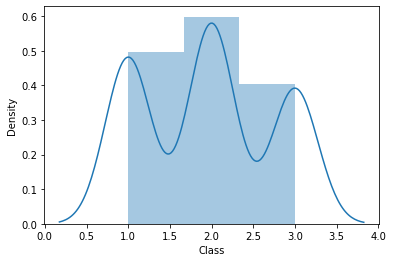

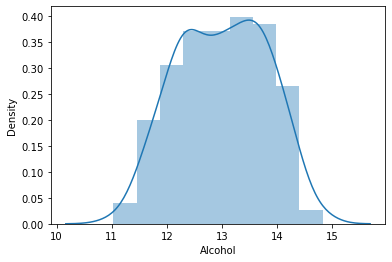

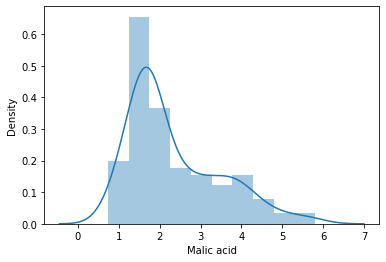

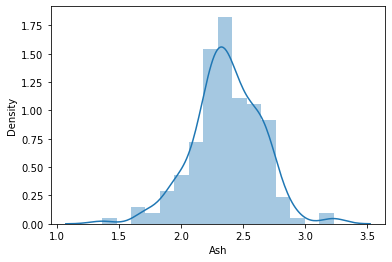

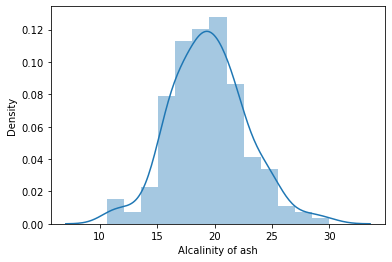

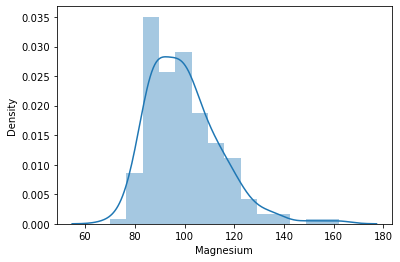

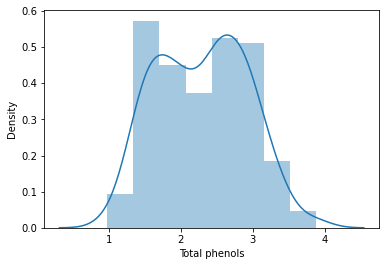

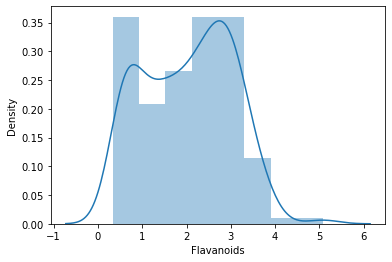

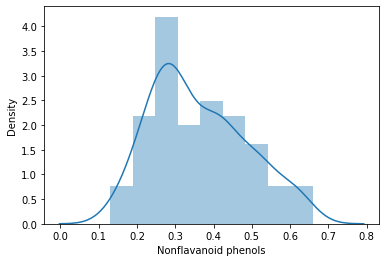

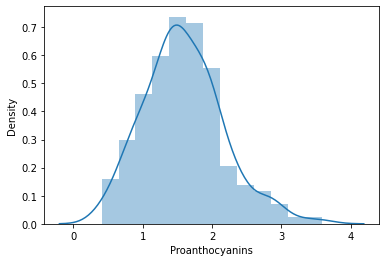

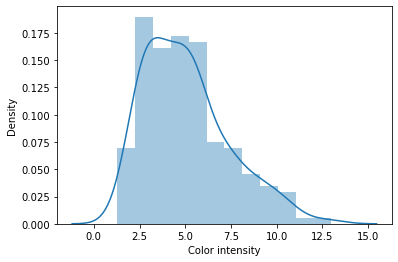

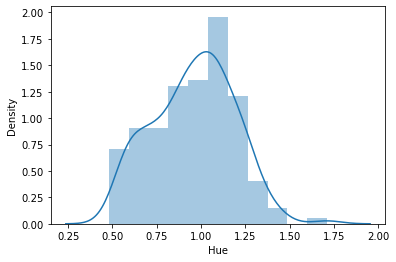

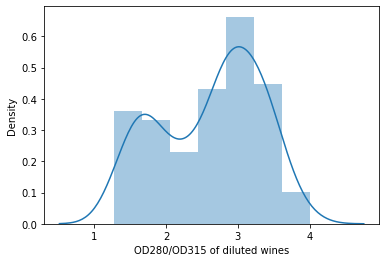

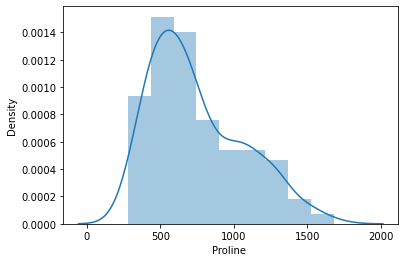

In [30]:
#plotting the distribution of all numeric variables in one function

for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

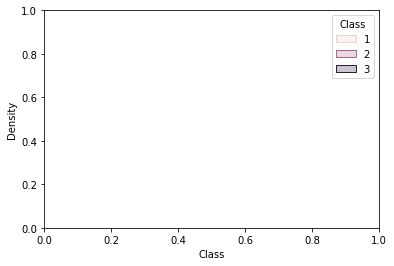

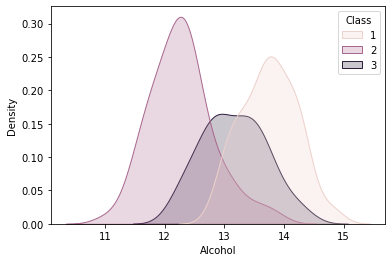

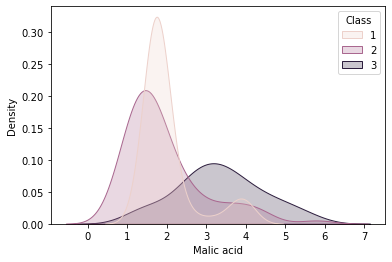

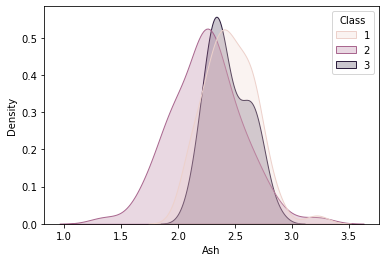

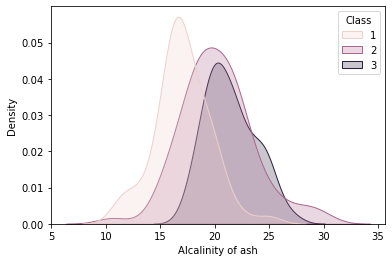

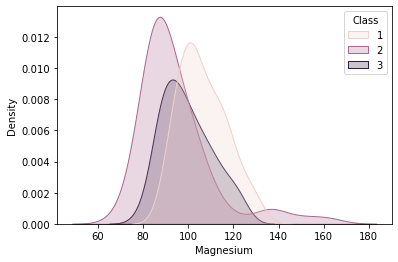

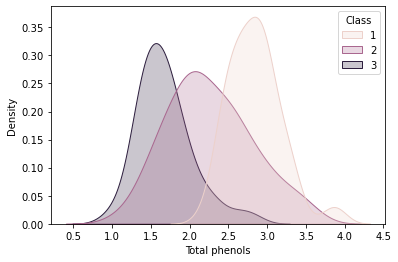

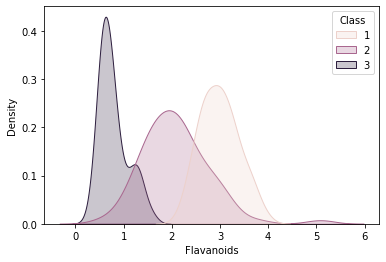

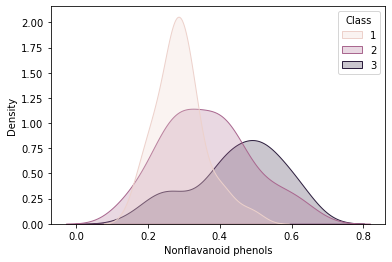

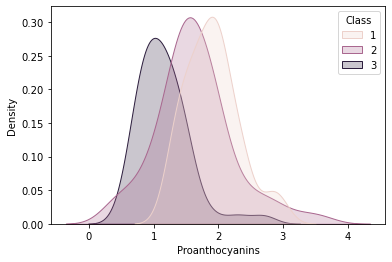

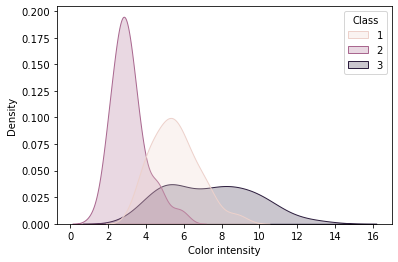

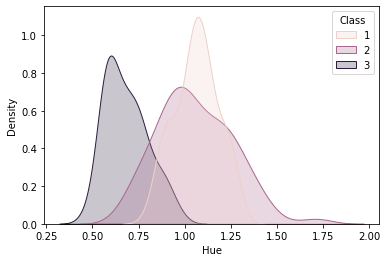

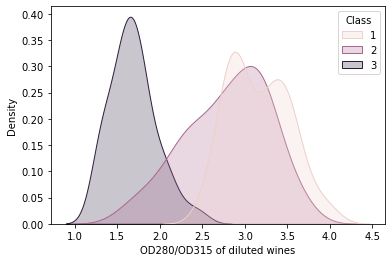

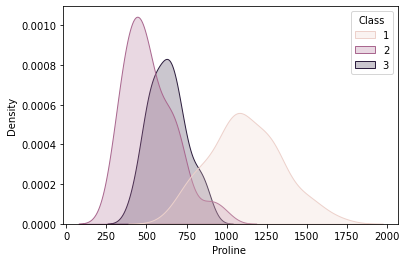

In [31]:
#distribution of data based on class values using kdeplot
for i in df.columns:
    plt.figure()
    sns.kdeplot(data = df,x = i,shade = True, hue = 'Class')

#### Q3

In [32]:
X = df.drop(columns=['Class'])
Y = df['Class']

In [33]:
#splitting the dataset into training and testing (70,30)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [34]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(3, X.shape[1]), max_iter=500, random_state=42)

In [35]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=500, random_state=42)

In [36]:
model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 12, 12), max_iter=500, random_state=42)

In [37]:
#making predictions
y_pred = model.predict(x_test)

In [38]:
#checking the accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9629629629629629

#### Q4

In [39]:
#tabulating the precission, recall and accuracy score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



#### Q5

In [40]:
#MPL Weight
model.coefs_

[array([[-0.09126088,  0.62124702,  0.45780737, -0.09317002, -0.11870905,
         -0.15666205, -0.43655813,  0.15773224, -0.14846391,  0.37959331,
         -0.23736899,  0.50138107],
        [ 0.35335563, -0.03097776, -0.23230979, -0.36174377, -0.03396774,
          0.16272957, -0.07042042, -0.42845223, -0.05747212, -0.22524272,
         -0.15279929, -0.05113974],
        [-0.07964917,  0.385866  , -0.24126437, -0.15487314,  0.36725853,
         -0.28517791,  0.39163818, -0.57194016, -0.52187542,  0.41156765,
          0.58660718,  0.28539054],
        [ 0.00896935, -0.61071859, -0.08653757,  0.03285648, -0.11156724,
          0.23400446, -0.49549378,  0.38420103,  0.0318295 ,  0.01941537,
         -0.43493539, -0.09181447],
        [ 0.01681449, -0.21491947,  0.57098806,  0.19097319,  0.34796329,
          0.47703995,  0.27422561,  0.33569266, -0.61370392, -0.13567696,
         -0.21056961, -0.12502445],
        [-0.20288026, -0.09566393,  0.40784338, -0.14455193, -0.33029843,
      

In [41]:
#MPL biases
model.intercepts_

[array([ 0.25338515,  0.40860523, -0.06969335,  0.23305045, -0.06202543,
         0.08592851,  0.29106249,  0.24323554, -0.16159232,  0.22957434,
         0.02901941, -0.30674834]),
 array([-0.53785556,  0.49593799,  0.26799614,  0.14824289, -0.01898529,
        -0.18582065, -0.13479394, -0.05753548,  0.12592137,  0.40699   ,
         0.23228492, -0.0758272 ]),
 array([-0.0958254 ,  0.39158511, -0.32185565,  0.37373115, -0.30207172,
         0.52732465,  0.1782548 ,  0.41128985, -0.42620344,  0.25148205,
         0.41564348,  0.10603319]),
 array([-0.16965464,  0.5120711 ,  0.53686015])]